In [6]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\sds\\Part 1 - Data Preprocessing\\Data.csv")

In [8]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [9]:
x = df.iloc[:, :-1] 

In [10]:
y = df['Purchased']

In [11]:
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


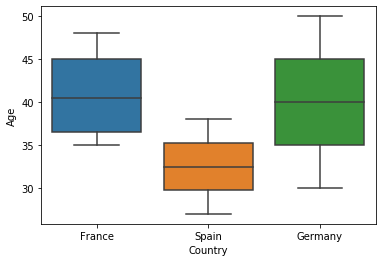

In [12]:
sb.boxplot(x = 'Country', y = 'Age', data = x)

In [13]:
def updateage(cols):
    if pd.isna(cols[1]) or pd.isnull(cols[1]):
        if cols[0] == 'Spain':
            return 33
        elif cols[0] == 'Germany':
            return 40
        else:
            return 41
    else:
        return cols[1]

In [14]:
ages= x[['Country','Age']].apply(updateage, axis = 1)

In [15]:
ages

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6    33.0
7    48.0
8    50.0
9    37.0
dtype: float64

In [16]:
x['Age'] = ages

In [17]:
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,33.0,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


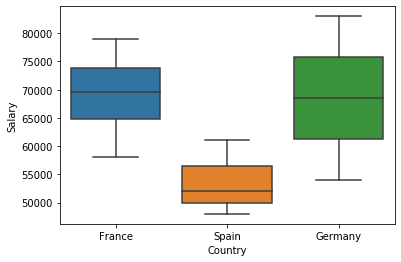

In [18]:
sb.boxplot(x = 'Country', y = 'Salary', data = x)

In [19]:
def updateSalary(cols):
    if pd.isna(cols[1]) or pd.isnull(cols[1]):
        if cols[0] == 'Spain':
            return 52000
        elif cols[0] == 'Germany':
            return 68000
        else:
            return 70000
    else:
        return cols[1]

In [20]:
salaries = x[['Country','Salary']].apply(updateSalary, axis = 1)

In [21]:
salaries

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4    68000.0
5    58000.0
6    52000.0
7    79000.0
8    83000.0
9    67000.0
dtype: float64

In [22]:
x['Salary'] = salaries

In [23]:
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,68000.0
5,France,35.0,58000.0
6,Spain,33.0,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(missing_values=np.NaN, strategy = 'mean')
salaries = imputer.fit_transform(np.array(df['Salary']).reshape(-1,1))

In [27]:
salaries

array([[72000.        ],
       [48000.        ],
       [54000.        ],
       [61000.        ],
       [63777.77777778],
       [58000.        ],
       [52000.        ],
       [79000.        ],
       [83000.        ],
       [67000.        ]])

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lEncode = LabelEncoder()
 

In [30]:
lEncode.fit_transform(x['Country'])

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

In [31]:
x = pd.concat([pd.get_dummies(x['Country']), x], axis = 1) 
x

,France,Germany,Spain,Country,Age,Salary
0,1,0,0,France,44.0,72000.0
1,0,0,1,Spain,27.0,48000.0
2,0,1,0,Germany,30.0,54000.0
3,0,0,1,Spain,38.0,61000.0
4,0,1,0,Germany,40.0,68000.0
5,1,0,0,France,35.0,58000.0
6,0,0,1,Spain,33.0,52000.0
7,1,0,0,France,48.0,79000.0
8,0,1,0,Germany,50.0,83000.0
9,1,0,0,France,37.0,67000.0


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
oH = OneHotEncoder()

In [35]:
y = oH.fit_transform(np.array(df['Country']).reshape(-1,1))

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x.drop('Country', axis = 1, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 101 )

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [40]:
x_train = sc.fit_transform(x_train)

In [41]:
x_test = sc.transform(x_test)

In [42]:
x_train

array([[-0.81649658,  0.        ,  0.81649658,  0.26045959,  0.13075549],
       [ 1.22474487,  0.        , -1.22474487, -0.17363972, -0.14943485],
       [ 1.22474487,  0.        , -1.22474487,  1.70745729,  1.81189756],
       [-0.81649658,  0.        ,  0.81649658, -0.46303926, -0.70981554],
       [-0.81649658,  0.        ,  0.81649658, -1.33123788, -1.08340267]])

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [49]:
y = df['Purchased'] > 'Y' 

In [58]:
def changeY(var):
    if var[0] == "Yes":
        return 1
    else:
        return 0

In [60]:
df['Purchased'] = df[['Purchased']].apply(changeY,axis = 1)

In [61]:
y = df['Purchased']

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 101)

In [64]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
predictions = lr.predict(x_test)

In [66]:
from sklearn.metrics import classification_report

In [68]:
y_test

8    0
2    0
0    0
4    1
Name: Purchased, dtype: int64

In [69]:
y_train

9    1
3    0
5    1
7    1
6    0
1    1
Name: Purchased, dtype: int64

In [73]:
predictions

array([0.44179226, 1.00092806, 0.76776301, 0.68791299])